# Zadanie 3
Wczytaj zestaw danych np. Digits dataset (baza ręcznie pisanych cyfr). Wykonaj redukcję wymiarowości danych za pomocą metody t-SNE. Przedstaw wyniki na wykresie 2D, gdzie każda
cyfra będzie miała swoją reprezentację w przestrzeni 2D.
Zbiór Digits dataset to zestaw danych zawierających obrazy ręcznie napisanych cyfr od 0 do 9.
Każdy obraz ma rozmiar 8x8 pikseli, co daje 64 cechy. Zestaw zawiera 1797 przykładów. Jest
to przydatny zestaw danych do zadań redukcji wymiarowości


In [15]:
import  pandas as pd
import  numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [16]:
digits = load_digits()
data = np.c_[digits.data, digits.target]
columns = np.append(digits.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)
target = df['target']
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [17]:
# Stosowanie TSNE
tsne = TSNE(n_components=2)
# Dopasowanie PCA do danych i transformacja
test_data = df.loc[:, df.columns != 'target']
X_tsne = tsne.fit_transform(test_data)
# Wyświetlenie nowych danych po zastosowaniu TSNE
print("Nowe dane po zastosowaniu TSNE:")
print(X_tsne)

Nowe dane po zastosowaniu TSNE:
[[ -2.7690337  53.538734 ]
 [ 10.490731  -12.050804 ]
 [-13.920127  -18.420729 ]
 ...
 [ -5.5074167 -10.704873 ]
 [-21.30323    15.606437 ]
 [-14.21122    -6.777892 ]]


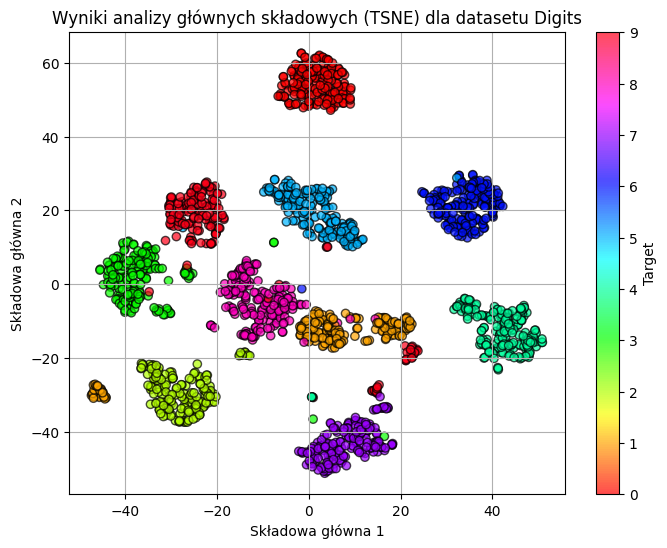

In [29]:
# Wykres wyników PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'], cmap='hsv', edgecolor='k', alpha=0.7)
plt.title('Wyniki analizy głównych składowych (TSNE) dla datasetu Digits')
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.grid(True)
# Dodanie legendy z etykietami klas
plt.colorbar(scatter, label='Target')
plt.show()

# Wnioski
Możemy zauważyć że redukcja wymiarowości wydzieliła nam prawie że idealne grupy dla każdej z liczb.